___ 
# Classification Project: Telco Churn
### By Tim Keriazes

___
### About the Project

### Objective:

My goal for this project was to discover the driving factors for customer churn at Telco. I will do this through the acquistition, preparation, and exploration of the telco customer data set. This will enable statistical testing, modeling, and model evaluations to be conducted in order to accurately predict customer churn and its driving factors. With that knowledge I will provide Telco a set of recommended actions to reduce churn and increase customer retention.

### Initial Hypothesis/Questions:
My intitial hypothesis was that the biggest driver to churn was the high cost of service for month to month customers, conversely, I believed that those locked in a annual or multi-year contracts would be far less likely to churn. Additional factors may be payment type customer utilizes, and customer tenure (which is inherently related to contract type), and internet service type.

### Project Planning:
I will explore my hypothesis through the acquistition, preparation, and exploration of the telco customer data set. This will enable statistical testing, modeling, and model evaluations to be conducted in order to accurately predict customer churn and its driving factors.
___
### Data Dictionary:

# <a name="data-dictionary"></a>Data Dictionary
|    index    |                              column/feature name                             | dtype                                        |  key/description  |                                                        |
|:-----------------:|:--------------------------------------------------------------------:|--------------------------------------------|:-------:|:------------------------------------------------------------------:|
 |0   |senior_citizen                         |7032 non-null   int64   |1 = senior citizen, 0 = not senior citizen
 |1  |tenure                                 |7032 non-null   int64   |Length in Months
 |2   |monthly_charges                        |7032 non-null   float64 |Monthly charges in dollars
 |3   |total_charges                          |7032 non-null   float64 |Total charges in dollars annually
 |4   |churn                                  |7032 non-null   object  | Yes or No 
 |5   |contract_type                          |7032 non-null   object  |Month to Month, One Year, Two Year
 |6   |internet_service_type                  |7032 non-null   object  |DSl, Fiber optic, none
 |7   |payment_type                           |7032 non-null   object  |Mailed Check, Electronic Check, Credit Card (automatic), Bank Transfer(automatic)
 |8   |gender_encoded                         |7032 non-null   int64   |1 = female, 0 = male
 |9   |partner_encoded                        |7032 non-null   int64   |1 = Yes, 0 = No
 |10  |dependents_encoded                     |7032 non-null   int64   |1 = Yes, 0 = No
 |11  |phone_service_encoded                  |7032 non-null   int64   |1 = Yes, 0 = No
 |12  |paperless_billing_encoded              |7032 non-null   int64   |1 = Yes, 0 = No
 |13  |churn_encoded                          |7032 non-null   int64   |1 = Yes, 0 = No
 |14  |multiple_lines_No phone service        |7032 non-null   uint8   |1 = Yes, 0 = No
 |15  |multiple_lines_Yes                     |7032 non-null   uint8   |1 = Yes, 0 = No
 |16  |online_security_No internet service    |7032 non-null   uint8   |1 = Yes, 0 = No
 |17  |online_security_Yes                    |7032 non-null   uint8   |1 = Yes, 0 = No
 |18  |online_backup_No internet service      |7032 non-null   uint8   |1 = Yes, 0 = No
 |19  |online_backup_Yes                      |7032 non-null   uint8   |1 = Yes, 0 = No
 |20  |device_protection_No internet service  |7032 non-null   uint8   |1 = Yes, 0 = No
 |21  |device_protection_Yes                  |7032 non-null   uint8   |1 = Yes, 0 = No
 |22  |tech_support_No internet service       |7032 non-null   uint8   |1 = Yes, 0 = No
 |23  |tech_support_Yes                       |7032 non-null   uint8   |1 = Yes, 0 = No
 |24  |streaming_tv_No internet service       |7032 non-null   uint8   |1 = Yes, 0 = No
 |25  |streaming_tv_Yes                       |7032 non-null   uint8   |1 = Yes, 0 = No
 |26  |streaming_movies_No internet service   |7032 non-null   uint8   |1 = Yes, 0 = No
 |27  |streaming_movies_Yes                   |7032 non-null   uint8   |1 = Yes, 0 = No
 |28  |contract_type_One year                 |7032 non-null   uint8   |1 = Yes, 0 = No
 |29  |contract_type_Two year                 |7032 non-null   uint8   |1 = Yes, 0 = No
 |30  |internet_service_type_Fiber optic      |7032 non-null   uint8   |1 = Yes, 0 = No
 |31  |internet_service_type_None             |7032 non-null   uint8   |1 = Yes, 0 = No
 |32  |payment_type_Credit card (automatic)   |7032 non-null   uint8   |1 = Yes, 0 = No
 |33  |payment_type_Electronic check          |7032 non-null   uint8   |1 = Yes, 0 = No
 |34  |payment_type_Mailed check              |7032 non-null   uint8   |1 = Yes, 0 = No

___
### Key Findings:
___
### The overall churn rate for customers at Telco is 26.6%.
  - Fiber optic customers make up 44.0% of customer base and churn at 18.4%.
  - Month to month contract customers make up 55.1% of customer base and churn at 23.5%.
  - Electronic check payment type customers make up 33.6% of customer base and churn at 15.2%.
  - Senior citizens make up 16% of customer base and churn at 41.7%
___  
### Median tenure of churned customers: 10 months.
  - Median tenure of month to month customers that have churned: 7 months.
  - Median tenure of electronic check payment customers that have churned: 9 months.
___
### Average monthly charges: $64.80.
  - Average monthly charges of customers who have churned: $74.44, 9.64 higher than average.
  - Average monthly charges of fiber customers: $88.13, $23.33 higher than average.
  - Average monthly charges of month to month customers: $73.02, $8.22 higher than average.
  - Average monthly charges of electronic check payment customers: $78.70, $13.90 higher than average.
___
## Tested Hypotheses and Results
#### 1. Ho : Mean of monthly charges of churned customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 2. Ho: mean length tenure of churned customers is <= mean length tenure of all customers
####    Ha: mean length tenure of churned customers is > mean length tenure of all customers
#### We fail to reject Ho
___
#### 3. Charges of customers who churn significantly different than those who do not churn
####    Ho: Charges of customers who churn equals that of those who don't churn.
####    Ha: Charges of customers who churn is not equal to that of those who don't churn.
#### We reject Ho, -t value and 0 p, significantly different
___
#### 4. Ho : Mean of monthly charges of churned fiber customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned fiber customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 5. Ho : Mean of monthly charges of churned month to month customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned month to month customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 6. Ho : Mean of monthly charges of churned electronic check customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned electronic customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___

## Instructions to reproduce the project and findings:

1. Prep Your Repo, ensure you can pull db from mysql using credentials from your env.py and my acquire.py
2. Import appropriate libraries and functions. utilize my prepare.py, aqcuire.py, explore.py
2. Acquire Data: Read TELCO data from MySQL using the get_telco_data() function in acquire.py
3. Clean, Prep & Split Data: Using functions tied to each other in prepare.py file:  prep_telco_data(), train_validate_test()
5. Explore Data: List all categorical & quantitative variables/features. Run exploratory stats functions on Uni-/Bi-/Multi-Variate data found in explore.py and telco_churn_report.ipynb
    - Hypothesis Testing
6. Identify Baseline: establish baseline prediction and accuracy
7. Modeling
    - Train
    - Validate
    - Test
8. Predict on Test Model
9. Export Predictions to CSV

In [1]:
# pd & np libraries 
import pandas as pd
import numpy as np

import prepare

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# to perform stats tests
from scipy import stats

# all sklearn lib's functs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support



#import all functions created in acquire , prepare & explore

import acquire
import model
import explore

# ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read TELCO data from MySQL using the get_telco_data() function in acquire.py

In [3]:
# read TELCO data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
# initial data summary and investigation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
# initial thoughts,columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id']
# could be redundant.
# total charges looks to be an object, probably isnt right.
# binary categoricals can be converted into numerical 1 or 0

In [7]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [8]:
df.payment_type_id.value_counts()

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64

In [9]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

In [10]:
df.internet_service_type_id.value_counts()

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

In [11]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [12]:
df.contract_type_id.value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

In [13]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

In [14]:
df.customer_id.value_counts()

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

### Clean, Prep 

In [15]:
# Drop duplicate columns
#payment type id, internet service type id, contract type id are all duplicates
#customer id, for our purpuses, doesnt give us any additional information
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [16]:
df.isna().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

In [17]:
# Drop null values stored as whitespace    
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [18]:
# Convert to correct datatype
df['total_charges'] = df.total_charges.astype(float)

In [19]:
 # Convert binary categorical variables to numeric
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [ ]:
# # Get dummies for non-binary categorical variables
# #
# dummy_df = pd.get_dummies(df[['multiple_lines', \
#                               'online_security', \
#                               'online_backup', \
#                               'device_protection', \
#                               'tech_support', \
#                               'streaming_tv', \
#                               'streaming_movies', \
#                               'contract_type', \
#                               'internet_service_type', \
#                               'payment_type']], dummy_na=False, \
#                               drop_first=True)

In [ ]:
 # Concatenate dummy dataframe to original 
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
# Drop unnecessary columns
df.drop(columns=['gender','partner','dependents','phone_service', \
                     'multiple_lines','online_security','online_backup', \
                     'device_protection','tech_support','streaming_tv', \
                     'streaming_movies','paperless_billing'], inplace=True)

In [ ]:
# #combine all to a function and add to prepare.py
# def prep_telco_data(df):
#     df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
#     df['total_charges'] = df['total_charges'].str.strip()
#     df = df[df.total_charges != '']
#     df['total_charges'] = df.total_charges.astype(float)
#     df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
#     df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
#     df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
#     df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
#     df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
#     df['churn_encoded'] = df.churn.replace({'Yes': 1, 'No': 0})
#     dummy_df = pd.get_dummies(df[['multiple_lines', \
#                               'online_security', \
#                               'online_backup', \
#                               'device_protection', \
#                               'tech_support', \
#                               'streaming_tv', \
#                               'streaming_movies', \
#                               'contract_type', \
#                               'internet_service_type', \
#                               'payment_type']], dummy_na=False, \
#                               drop_first=True)
#     df = pd.concat([df, dummy_df], axis=1)
#     df.drop(columns=['gender','partner','dependents','phone_service', \
#                      'multiple_lines','online_security','online_backup', \
#                      'device_protection','tech_support','streaming_tv', \
#                      'streaming_movies','paperless_billing'], inplace=True)
#     return df

In [ ]:
# df = prep_telco_data(df)

In [21]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,No,One year,DSL,Mailed check,1,1,1,1,1,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7032 non-null   object 
 1   senior_citizen             7032 non-null   int64  
 2   partner                    7032 non-null   object 
 3   dependents                 7032 non-null   object 
 4   tenure                     7032 non-null   int64  
 5   phone_service              7032 non-null   object 
 6   multiple_lines             7032 non-null   object 
 7   online_security            7032 non-null   object 
 8   online_backup              7032 non-null   object 
 9   device_protection          7032 non-null   object 
 10  tech_support               7032 non-null   object 
 11  streaming_tv               7032 non-null   object 
 12  streaming_movies           7032 non-null   object 
 13  paperless_billing          7032 non-null   objec

### start to look at the data set to find anything that may jump out
#### visualize the feature set with the target variable, can we find any recognizable patterns or relationships?

In [23]:
df.churn_encoded.value_counts()

0    5163
1    1869
Name: churn_encoded, dtype: int64

In [24]:
#overall churn rate of df set
df.churn_encoded.mean()

0.26578498293515357

In [67]:
#define figure size
sns.set(rc={"figure.figsize":(6, 6)}) #width=6, height=6

Text(0.5, 0, 'Churned')

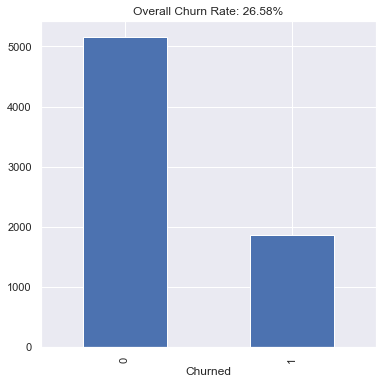

In [68]:
df.churn_encoded.value_counts().sort_index().plot.bar()
churn_rate = df.churn_encoded.mean()
plt.title(f"Overall Churn Rate: {churn_rate:.2%}")
plt.xlabel('Churned')

Looks like the overall churn rate is 26.58%

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

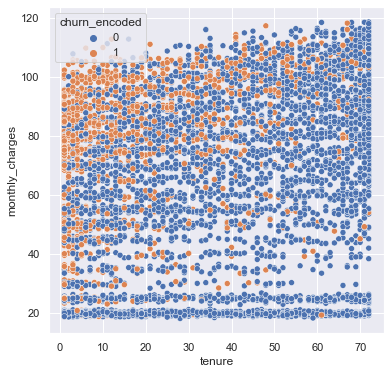

In [69]:
sns.scatterplot(x="tenure", y="monthly_charges", hue="churn_encoded", data=df)

Looks to me that the majority of the churn happens when tenure is less than 20 months

<AxesSubplot:xlabel='churn', ylabel='count'>

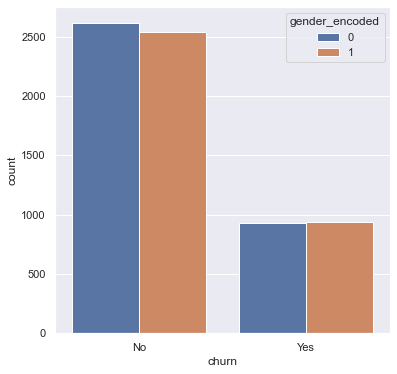

In [70]:
sns.countplot(x="churn", data=df, hue="gender_encoded")

male and females seem to churn the same

<AxesSubplot:xlabel='churn', ylabel='count'>

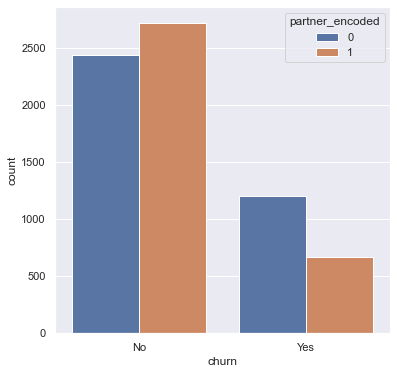

In [71]:
sns.countplot(x="churn", data=df, hue="partner_encoded")

customers who have a partner churn less than single customers

<AxesSubplot:xlabel='churn', ylabel='count'>

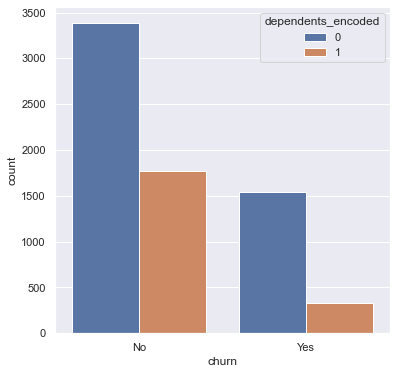

In [88]:
sns.countplot(x="churn", data=df, hue="dependents_encoded")

customers with dependents churn less than those without

<AxesSubplot:xlabel='churn', ylabel='count'>

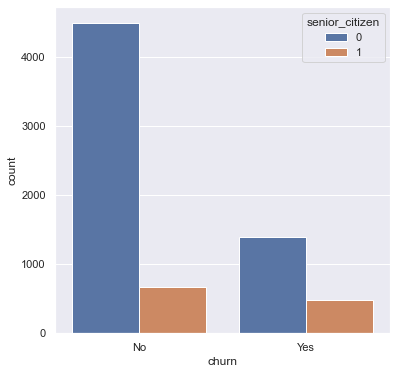

In [73]:
sns.countplot(x="churn", data=df, hue="senior_citizen")

senior citizen churn rate doesnt show much

<AxesSubplot:xlabel='churn', ylabel='count'>

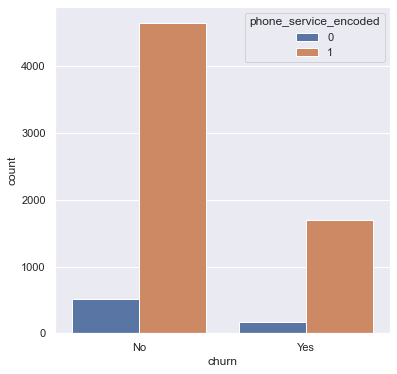

In [74]:
sns.countplot(x="churn", data=df, hue="phone_service_encoded")

phone service

<AxesSubplot:xlabel='churn', ylabel='count'>

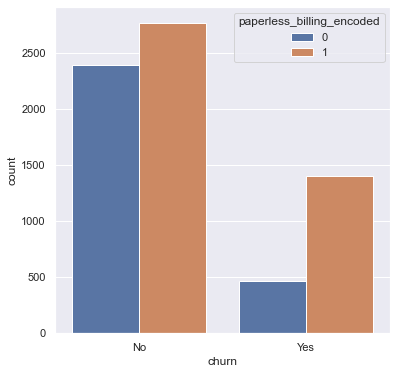

In [75]:
sns.countplot(x="churn", data=df, hue="paperless_billing_encoded")

Paperless billing accounts for the majority of churned customers

In [77]:
['multiple_lines','online_security','online_backup','device_protection','tech_support',
 'streaming_tv','streaming_movies','contract_type','internet_service_type','payment_type']

['multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type',
 'internet_service_type',
 'payment_type']

<AxesSubplot:xlabel='churn', ylabel='count'>

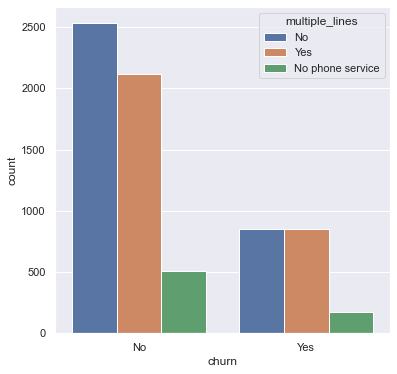

In [78]:
sns.countplot(x="churn", data=df, hue="multiple_lines")

no real impact from having multiple lines

<AxesSubplot:xlabel='churn', ylabel='count'>

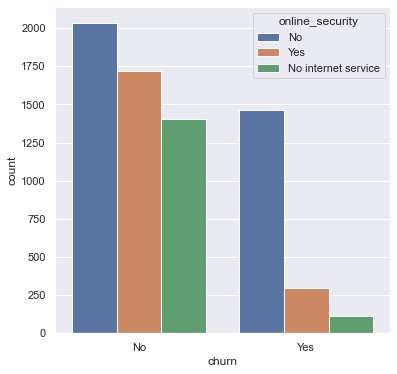

In [89]:
sns.countplot(x="churn", data=df, hue="online_security")

churned customers that didnt have online security were largest segment

<AxesSubplot:xlabel='churn', ylabel='count'>

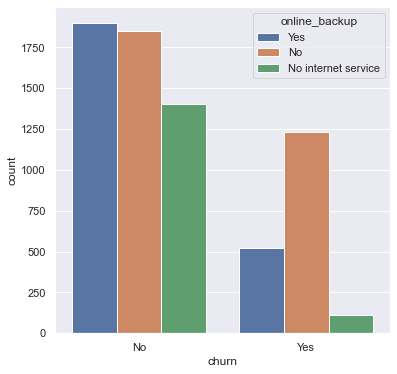

In [80]:
sns.countplot(x="churn", data=df, hue="online_backup")

customers who didnt have online backup churned more often

<AxesSubplot:xlabel='churn', ylabel='count'>

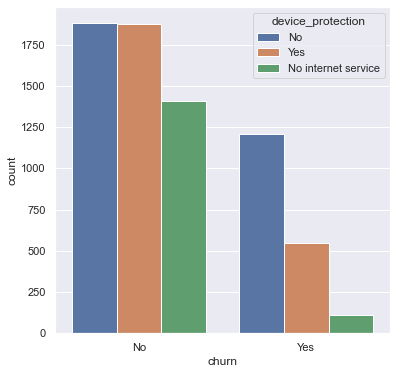

In [81]:
sns.countplot(x="churn", data=df, hue="device_protection")

majority of churned customers didnt have device protection

<AxesSubplot:xlabel='churn', ylabel='count'>

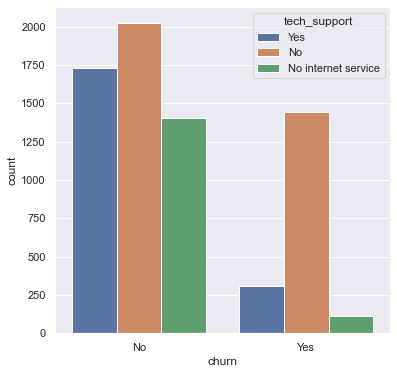

In [82]:
sns.countplot(x="churn", data=df, hue="tech_support")

looks like there is a impact from customers having tech support or not

<AxesSubplot:xlabel='churn', ylabel='count'>

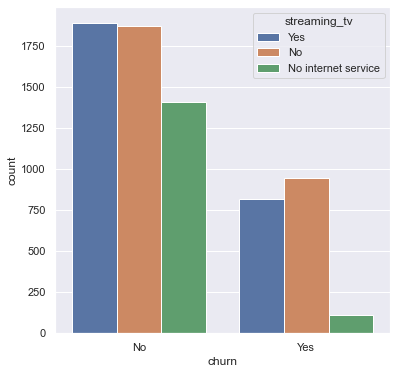

In [83]:
sns.countplot(x="churn", data=df, hue="streaming_tv")

streaming tv doesnt look like much of an impact

<AxesSubplot:xlabel='churn', ylabel='count'>

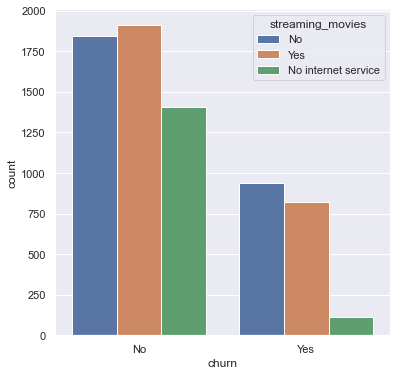

In [84]:
sns.countplot(x="churn", data=df, hue="streaming_movies")

streaming movies doesnt look like much of an impact

<AxesSubplot:xlabel='churn', ylabel='count'>

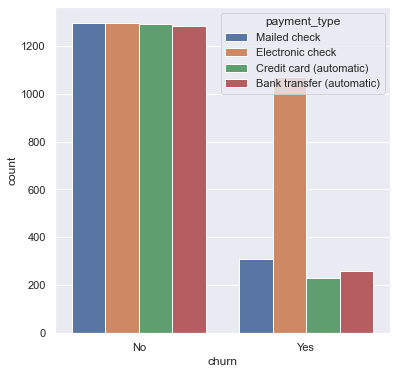

In [85]:
#electronic check has the highest rate of churn
sns.countplot(x="churn", data=df, hue="payment_type")

this looks really interesting, huge difference in payment types for churners specifically electronic checks

<AxesSubplot:xlabel='churn', ylabel='count'>

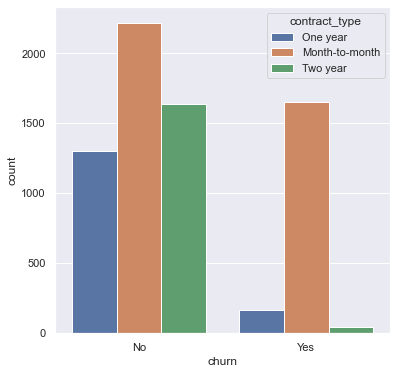

In [86]:
#month to month has the highest rate of churn
sns.countplot(x="churn", data=df, hue="contract_type")

another seemingly big one here, looks like the month to month customers are the big churners

<AxesSubplot:xlabel='churn', ylabel='count'>

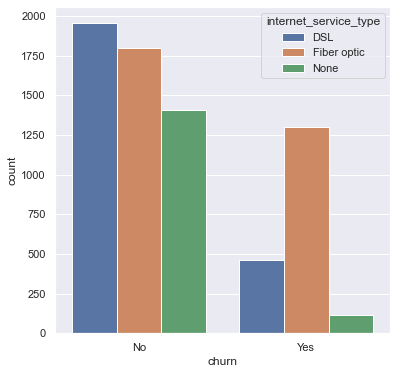

In [87]:
#fiber optic has the highest rate of churn
sns.countplot(x="churn",  data=df, hue="internet_service_type") 

fiber customers seem to churn more than dsl and no 

### from initial look, examine variables that show promise

In [ ]:
features = ['internet_service_type', 'contract_type', 'payment_type', 'senior_citizen']

In [ ]:
list(enumerate(features))

In [ ]:
churn_rate = df.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(28, 8), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=df, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [ ]:
# Catplot with kind="count"
sns.set_theme(style="whitegrid")
sns.catplot(x="churn_encoded", y="contract_type", data=df, kind="violin")

In [ ]:
#shows that there is a higher cost of service for fiber optic, high churn, my guess is those are month to month paid with echeck
features = ['internet_service_type', 'contract_type', 'payment_type','senior_citizen']
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "monthly_charges",
        hue="churn_encoded",
        data=df,
        split=True,
        scale = 'count',
        ax=ax[i],
        
    )

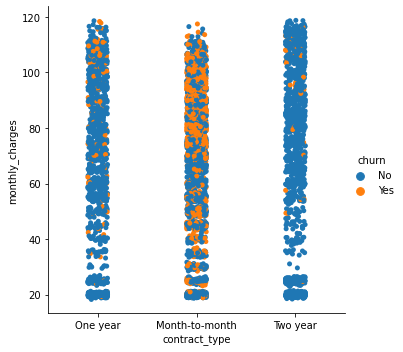

In [20]:
# Using a Catplot, month to month with charges over 60, high churn
sns.catplot(x="contract_type", y="monthly_charges", data=df, hue="churn")

In [ ]:
#electronic check with charges over 60, high churn
sns.catplot(x="payment_type", y="monthly_charges", data=df, hue="churn")

In [ ]:
# Using a Catplot
sns.catplot(x="internet_service_type", y="monthly_charges", data=df, hue="churn")

In [ ]:
#churn is happening sub 10 month tenure, meaning month to month contract has highest churn
sns.relplot(x="tenure", y="monthly_charges", hue="churn", data=df, height=6, aspect=1)
plt.xlim(0, 73)

In [ ]:
#low tenure, high monthly cost more churn
sns.jointplot("tenure", "monthly_charges", data=df, kind='hex')

In [ ]:
#electronic check customers make up 33.6% of customer base and churn at 15.2%
pd.crosstab(df.churn, df.payment_type, margins=True, normalize=True)

In [ ]:
#MTM make up 55.1% of customer base and churn at 23.5%
pd.crosstab(df.churn, df.contract_type, margins=True, normalize=True)

In [ ]:
#fiber optic customers make up 44.0% of customer base and churn at 18.4%
pd.crosstab(df.churn, df.internet_service_type, margins=True, normalize=True)

In [ ]:
#senior citizens are 16.2% of customer base and churn at 41.7%
pd.crosstab(df.churn, df.senior_citizen, margins=True, normalize=True)

In [ ]:
#Median tenure for churn customers is 10 months
df[df.churn == 'Yes'].tenure.median()

In [ ]:
#mean tenure, outliers towards the high end, go with median
df[df.churn == 'Yes'].tenure.mean()

In [ ]:
df[df.churn == 'Yes'].tenure.describe()

In [ ]:
df[df.churn == 'No'].tenure.describe()

In [ ]:
df[df.internet_service_type == 'Fiber optic'].tenure.describe()

In [ ]:
sns.jointplot("tenure", "monthly_charges", data=df[df.internet_service_type == 'Fiber optic'], kind='hex')

In [ ]:
#churners pay 13.1$ more per month
df[df.churn == 'Yes'].monthly_charges.describe()

In [ ]:
df[df.churn == 'No'].monthly_charges.describe()

In [ ]:
churners = df[df.churn == 'Yes']
churners

In [ ]:
churners.internet_service_type == 'Fiber optic'

In [ ]:
churners[churners.internet_service_type == 'Fiber optic'].tenure.median()

In [ ]:
churners[churners.contract_type == 'Month-to-month'].tenure.median()

In [ ]:
churners[churners.payment_type == 'Electronic check'].tenure.median()

In [ ]:
df.monthly_charges.mean()

In [ ]:
churners.monthly_charges.mean()

In [ ]:
#Ho : Mean of monthly charges of churned month to month customers >= Mean of monthly charges of all customers
#Ha : Mean of monthly charges of churned month to month customers < Mean of monthly charges of all customers
# We fail to reject Ho
churners[churners.contract_type == 'Month-to-month'].monthly_charges.mean()

In [ ]:
alpha=.05
churn_sample = churners[churners.contract_type == 'Month-to-month'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

In [ ]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

In [ ]:
#Ho : Mean of monthly charges of churned electronic check customers >= Mean of monthly charges of all customers
#Ha : Mean of monthly charges of churned electronic customers < Mean of monthly charges of all customers
# We fail to reject Ho
churners[churners.payment_type == 'Electronic check'].monthly_charges.mean()

In [ ]:
alpha=.05
churn_sample = churners[churners.payment_type == 'Electronic check'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

In [ ]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

In [ ]:
#Ho : Mean of monthly charges of churned fiber customers >= Mean of monthly charges of all customers
#Ha : Mean of monthly charges of churned fiber customers < Mean of monthly charges of all customers
#### We fail to reject Ho
churners[churners.internet_service_type == 'Fiber optic'].monthly_charges.mean()

In [ ]:
alpha=.05
churn_sample = churners[churners.internet_service_type == 'Fiber optic'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

In [ ]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

In [ ]:
churners[churners.senior_citizen == 1].monthly_charges.mean()

In [ ]:
fiber_churn=churners[churners.internet_service_type == 'Fiber optic']

In [ ]:
sns.scatterplot(x="tenure", y="monthly_charges", data=fiber_churn, hue="payment_type")

In [ ]:
sns.kdeplot(x="tenure", y="monthly_charges", data=fiber_churn, hue="payment_type",kind='kde')

In [ ]:
sns.jointplot("monthly_charges", "tenure", data=fiber_churn, kind='hex')

In [ ]:
#one tailed t test, monthly charges are higher for customers who churn than those that dont
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()

In [ ]:
#Ho: mean of monthly charges of churned customers is >= mean of monthly charges of all customers
#Ha: mean of monthly charges of churned customers is < mean of monthly charges of all customers
alpha=.05
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

In [ ]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

In [ ]:
#one tail t test, majority of churned customers are month to month customers, aka tenure less than 12
churn_sample = df[df.churn == 'Yes'].tenure

churn_sample.hist()

In [ ]:
#Ho: mean length tenure of churned customers is <= mean length tenure of all customers
#Ha: mean length tenure of churned customers is > mean length tenure of all customers
alpha=.05
churn_sample = df[df.churn == 'Yes'].tenure
overall_mean = df.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

In [ ]:
if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

In [ ]:
no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

In [ ]:
# charges of customers who churn significantly different than those who do not churn

# Ho: charges of customers who churn equals that of those who don't churn.

# Ha: charges of customers who churn is not equal to that of those who don't churn.

In [ ]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p
#-t value and 0 p, significantly different

In [ ]:
r_monthly_charges, _ = stats.pearsonr(df.churn_encoded, df.monthly_charges)
r_tenure, _ = stats.pearsonr(df.churn_encoded, df.tenure)

print('Correlation between churn and monthly_charges')
print(f'  r = {r_monthly_charges:.3f}')
print('Correlation between churn and tenure')
print(f'  r = {r_tenure:.3f}')

In [ ]:
r, p = stats.pearsonr(df.churn_encoded, df.monthly_charges)
r, p

In [ ]:
index = ['Churn', 'No Churn']
columns = ['contract_type', 'internet_service_type']

observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.372, .132], [.367, .130]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
pd.crosstab(df.churn, df.internet_service_type, margins=True, normalize=True)

In [ ]:
istchurn=pd.crosstab(df.churn, df.internet_service_type, margins=True, normalize=True)

In [ ]:
chi2, p, degf, expected=stats.chi2_contingency(istchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
pd.crosstab(df.churn, df.contract_type, margins=True, normalize=True)

In [ ]:
ctchurn = pd.crosstab(df.churn, df.contract_type, margins=True, normalize=True)

In [ ]:
chi2, p, degf, expected=stats.chi2_contingency(ctchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
pd.crosstab(df.churn, df.payment_type, margins=True, normalize=True)

In [ ]:
ptchurn = pd.crosstab(df.churn, df.payment_type, margins=True, normalize=True)

In [ ]:
chi2, p, degf, expected=stats.chi2_contingency(ptchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
sns.distplot(df.tenure ,hist=False, bins=10);

In [ ]:
sns.distplot(df.monthly_charges ,hist=False, bins=10);

In [ ]:
df.corr()['churn_encoded'].sort_values(ascending = False).plot(kind='bar')

### Exploration summary and conclusion:

#### Key Findings:
##### The overall churn rate for customers at Telco is 26.6%.
###### Fiber optic customers make up 44.0% of customer base and churn at 18.4%.
###### Month to month contract customers make up 55.1% of customer base and churn at 23.5%.
###### Electronic check payment type customers make up 33.6% of customer base and churn at 15.2%.
###### Senior citizens make up 16% of customer base and churn at 41.7%
##### Median tenure of churned customers: 10 months.
##### Median tenure of month to month customers that have churned: 7 months.
##### Median tenure of electronic check payment customers that have churned: 9 months.
##### Average monthly charges: 64.80.
##### Average monthly charges of customers who have churned: 74.44, 9.64 higher than average.
##### Average monthly charges of fiber customers: 88.13, 23.33 higher than average.
##### Average monthly charges of month to month customers: 73.02, 8.22 higher than average.
##### Average monthly charges of electronic check payment customers: 78.70, 13.90 higher than average.

## Tested Hypotheses and Results
#### 1. Ho : Mean of monthly charges of churned customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 2. Ho: mean length tenure of churned customers is <= mean length tenure of all customers
####    Ha: mean length tenure of churned customers is > mean length tenure of all customers
#### We fail to reject Ho
___
#### 3. Charges of customers who churn significantly different than those who do not churn
####    Ho: Charges of customers who churn equals that of those who don't churn.
####    Ha: Charges of customers who churn is not equal to that of those who don't churn.
#### We reject Ho, -t value and 0 p, significantly different
___
#### 4. Ho : Mean of monthly charges of churned fiber customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned fiber customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 5. Ho : Mean of monthly charges of churned month to month customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned month to month customers < Mean of monthly charges of all customers
#### We fail to reject Ho
___
#### 6. Ho : Mean of monthly charges of churned electronic check customers >= Mean of monthly charges of all customers
####    Ha : Mean of monthly charges of churned electronic customers < Mean of monthly charges of all customers
#### We fail to reject Ho

In [ ]:
# test prep_telco_data & train_validate_test
train, validate, test = prepare.train_validate_test(df)

In [ ]:
#modeling
#identify baseline prediction
train.churn.value_counts()

In [ ]:
train.shape, validate.shape, test.shape

In [ ]:
train.head()

In [ ]:
#identify baseline
#baseline will be mode, no churn

In [ ]:
baseline_accuracy = (train.churn_encoded ==0).mean()
baseline_accuracy

In [ ]:
#modeling
#review current features, narrow down to selected features
train.info()

In [ ]:
#features I want included, ensuring target is not in the features
features = ['senior_citizen', 'tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']
#what our target is
target=['churn_encoded']

In [ ]:
# setup our X inputs and y target variable for each split
# listed features will be input into features
X_train = train[features] 
y_train = train[target] 

X_validate = validate[features] 
y_validate = validate[target]

X_test = test[features] 
y_test = test[target]

In [ ]:
# create, new Decision Tree model
# Be sure to set the max_depth argument

tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
#train/fit our model on the training data

tree1 = tree1.fit(X_train, y_train)
tree1

In [ ]:
#create a function to calculate the metrics
def get_metrics(mod, X, y):
    baseline_accuracy = (train.churn == 0).mean()
    y_pred = mod.predict(X)
    accuracy = mod.score(X, y)
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
        The accuracy for our model is: {accuracy:.2%} 
    ''')
    return prfs

In [ ]:
# Now we'll make a SET OF PREDICTIONS using this trained model
y_pred = tree1.predict(X_train)
# ESTIMATE THE PROBABLITIES for each class
y_pred_proba = tree1.predict_proba(X_train)

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

In [ ]:
plot_confusion_matrix(tree1, X_train, y_train)

In [ ]:

print(classification_report(y_train, y_pred))

In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

In [ ]:
# Finding Optimal max_depth

In [ ]:
# loop to adjust depth
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

In [ ]:
# Which model performs best on your out-of-sample data, the validate set?

In [ ]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,25):
    tree = DecisionTreeClassifier(max_depth= i, random_state=123) #make model 

    tree = tree.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=tree.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)#use model on validate
    
    output = {
        "max_depth":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#max depth of 5 produces accuracy of train = 0.813056 validate= 0.778436 difference = 0.034620 
#compared to 73.4% baseline

In [ ]:
#random forest model

In [ ]:
#create the model
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=21, random_state=123)
rf

In [ ]:
#fit the model
rf.fit(X_train, y_train)

In [ ]:
# Feature Importance
# Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

In [ ]:
# Make Predictions on survival

y_pred = rf.predict(X_train)
y_pred

In [ ]:
# Estimate Probability

# Estimate the probability ofsurvival, using the training data.
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

In [ ]:
# Evaluate Model
# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
# Create a classificaiton report

# Precision: TP/(tp+FP)
 
# Recall: TP/(TP+FN)
 
# F1-Score: A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.
# F1 between zero and one

# F1-score = harmonic mean = 2/(1/precision+1/recall)
# Support: number of occurrences of each class.
print(classification_report(y_train, y_pred))

In [ ]:
# Validate Model
# Evaluate on Out-of-Sample data

# Compute the accuracy of the model when run on the validate dataset.
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

TN, FP, FN, TP

In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

In [ ]:
# Run through steps increasing your min_samples_leaf and decreasing your max_depth.
# loop to adjust depth
for i in range(1, 10):
    # Make the model
    rf = RandomForestClassifier(max_depth=5, min_samples_leaf=i, random_state=123)

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"RF with min samples leaf of {i}")
    print(pd.DataFrame(report))
    print()

In [ ]:
# Run through steps increasing your min_samples_leaf and decreasing your max_depth.
# loop to adjust depth
for i in range(1, 20):
    # Make the model
    rf = RandomForestClassifier(max_depth=20-i, min_samples_leaf=1+i, random_state=123)

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"RF with max depth of {20-i}")
    print(pd.DataFrame(report))
    print()

In [ ]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,10):
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf=2*i, random_state=123) #make model 

    rf = rf.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=rf.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)#use model on validate
    
    output = {
        "min_samples_leaf":2*i,
        "max_depth":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.plot(df.min_samples_leaf, df.train_accuracy, marker = 'x')
plt.plot(df.min_samples_leaf, df.validate_accuracy, marker = 'x')

plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#min leaf 12 max depth 6 produced train = 0.810008 validate = 0.784953 difference of 0.025055
#greater than 73.4 baseline

In [ ]:
#knn model

In [ ]:
# Create KNN Object
knn4 = KNeighborsClassifier(n_neighbors=4, weights='uniform')

In [ ]:
# Fit the Model to the Training Data
knn4.fit(X_train, y_train)

In [ ]:
# Make Predictions
y_pred = knn4.predict(X_train)
y_pred[:10]

In [ ]:
y_train[:10]

In [ ]:
# Estimate Probability
y_pred_proba = knn4.predict_proba(X_train)
y_pred_proba[:10]

In [ ]:
# Evaluate Model

In [ ]:
# Compute the Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn4.score(X_train, y_train)))

In [ ]:
# confusion matrix
print(confusion_matrix(y_train, y_pred))

In [ ]:
#plot confusion matrix
plot_confusion_matrix(knn4, X_train, y_train)

In [ ]:
#true neg, false pos, false neg, true pos with.ravel method, works on confusion matrix 2x2
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())


In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
# loop to adjust neighbors
for i in range(1, 21):
    # Make the model
    knntest = KNeighborsClassifier(n_neighbors=i, weights='uniform')

    # Fit the model (on train and only train)
    knntest = knntest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = knntest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"KNN with neighbor value of {i}")
    print(pd.DataFrame(report))
    print()

In [ ]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,50):
    knntest = KNeighborsClassifier(n_neighbors=i, weights='uniform') #make model 

    knntest = knntest.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=knntest.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = knntest.score(X_validate, y_validate)#use model on validate
    
    output = {
        "neighbors":i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

In [ ]:
#21 nieghbors with train = 0.802388 and validate = 0.779621 with a difference of 0.022767
#compared to 73.4% baseline

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.neighbors, df.train_accuracy, marker = 'o')
plt.plot(df.neighbors, df.validate_accuracy, marker = 'o')
plt.title('Model becomes less overfit with more neighbors')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#logistic regression

In [ ]:
# create the object
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [ ]:
# fit the model on train data
logit.fit(X_train, y_train)

In [ ]:
# Make Predictions
y_pred = logit.predict(X_train)
y_pred[:10]

In [ ]:
# Make Predictions
y_pred = logit.predict(X_train)
y_pred[:10]

In [ ]:
y_train[:10]

In [ ]:
# Estimate Probability
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[:10]

In [ ]:
#evaluate model
# Compute the Accuracy
print('Accuracy of logistic regression model on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

In [ ]:
#true neg, false pos, false neg, true pos with.ravel method, works on confusion matrix 2x2
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
#loop to compare in sample and out of sample

metrics=[]

for i in range(1,10):
    logit = LogisticRegression(C=1/i**i, random_state=123, solver='saga') #make model 

    logit = logit.fit(X_train, y_train) #fit model
   
    in_sample_accuracy=logit.score(X_train, y_train) #usemodel on train
    
    out_of_sample_accuracy = logit.score(X_validate, y_validate)#use model on validate
    
    output = {
        "c value":1/i**i,
        "train_accuracy":in_sample_accuracy,
        "validate_accuracy":out_of_sample_accuracy
    }
    metrics.append(output)
df = pd.DataFrame(metrics)
df["difference"]=df.train_accuracy-df.validate_accuracy
df

In [ ]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
     .format(logit2.score(X_train, y_train)))

In [ ]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train, y_train)

y_pred = logit3.predict(X_train)

accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
# Only tenure and monthly charges 
features = ['tenure', 'monthly_charges']


logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("Only tenure and monthly charges Features ")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
# Only 'senior_citizen','tenure', 'contract_type_One year','internet_service_type_Fiber optic'
features = [ 'senior_citizen','tenure', 'contract_type_One year','internet_service_type_Fiber optic']

# All features, but we'll use the class_weights to hold the actual ratios
logit5 = LogisticRegression( random_state=123)

logit5.fit(X_train[features], y_train)

y_pred = logit5.predict(X_train[features])
accuracy = logit5.score(X_train[features], y_train)

print("Only senior_citizen, tenure, contract_type_One year', internet_service_type_Fiber optic")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.3}')

In [ ]:
# Only 'monthly_charges','payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check'
features = [ 'monthly_charges','payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']

# All features, but we'll use the class_weights to hold the actual ratios
logit6 = LogisticRegression( random_state=123)

logit6.fit(X_train[features], y_train)

y_pred = logit6.predict(X_train[features])
accuracy = logit6.score(X_train[features], y_train)

print("monthly_charges, payment_type_Credit card (automatic), payment_type_Electronic check, payment_type_Mailed check features")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
# All Features, C ~ 0
# All features, but we'll use the class_weights to hold the actual ratios
features = ['senior_citizen', 'tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']

logit6 = LogisticRegression(random_state=123, C=0.0001)

logit6.fit(X_train, y_train)

y_pred = logit6.predict(X_train)
accuracy = logit6.score(X_train, y_train)

print("All Features, C hyperparameter approaching 0")
print("Baseline is", round(baseline_accuracy, 2))
print(f'Accuracy of this Logistic Regression on training set: {accuracy:.2}')

In [ ]:
# Now Let's Pick our Best Models and Evaluate on Validate!
# logit trained with  all features features and has .80 accuracy on train
# logit4 trained on features = [ 'senior_citizen','tenure', 'contract_type_One year','internet_service_type_Fiber optic'] has .79 accuracy
# logit6 trained on all features with c value approaching 0 has a .79 accuracy

In [ ]:
#logit validate
features = ['senior_citizen', 'tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']


y_pred = logit.predict(X_validate[features])

print('Logit model using all features')
print(classification_report(y_validate, y_pred))

In [ ]:
#logit4 validate
features = ['tenure', 'monthly_charges']

y_pred = logit4.predict(X_validate[features])

print('Only tenure and monthly charges as the features')
print(classification_report(y_validate, y_pred))

In [ ]:
#logit6 validate
features = ['senior_citizen', 'tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']
y_pred = logit6.predict(X_validate[features])
print('Logit1 model using age, pclass, fare, and is_female as the features')
print(classification_report(y_validate, y_pred))

In [ ]:
#test

In [ ]:
get_metrics(rf, X_test, y_test)

In [ ]:
#predict On Test Model
#In order to create predictions on the entire df, I will need to acquire a fresh version of my TELCO data set.

In [ ]:
# Acquire data
telco = acquire.get_telco_data()

In [ ]:
# Clean & prep data
telco = prepare.prep_telco_data(telco)

In [ ]:
# Double check it looks correct
telco.info()

In [ ]:
#remove all the columns that werent used as features

In [ ]:
dropcols = ['total_charges', 'churn', 'contract_type', 'internet_service_type', 
            'payment_type', 'gender_encoded', 'partner_encoded', 'dependents_encoded', 
            'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded', 
            'multiple_lines_No phone service', 'multiple_lines_Yes', 
            'online_security_No internet service', 'online_security_Yes', 
            'online_backup_No internet service', 'online_security_Yes', 
            'online_backup_No internet service', 'online_backup_Yes', 
            'device_protection_No internet service', 'device_protection_Yes', 
            'tech_support_No internet service', 'tech_support_Yes', 
            'streaming_tv_No internet service', 'streaming_tv_Yes', 
            'streaming_movies_No internet service','streaming_movies_Yes']


In [ ]:
# # Dropcols
telco.drop(columns= dropcols, inplace=True)

In [ ]:
#run my final model rf on my telco df to create a new dataframe of all predicted Probability of churn.
churn_probability=pd.DataFrame({'churn_probability': rf.predict_proba(telco)[:,1]})

In [ ]:
churn_probability.head()

In [ ]:
#created a new column in my telco df that contains a boolean prediction of churn per customer.
telco['prediction'] = rf.predict(telco)

In [ ]:
#slice that column off into it's own dataframe.
churn_pred = pd.DataFrame(telco['prediction'])
churn_pred.info()

In [ ]:
# Export Predictions to CSV

In [ ]:
# Now there are two dataframes of my predictions and their probabilities, 
# need to create one last dataframe of the customer_ids.

In [ ]:
customer_id = pd.DataFrame(acquire.get_telco_data()['customer_id'])
customer_id.head()

In [ ]:
# concatenate the three columns into a single dataframe.

In [ ]:
predictions = pd.concat([customer_id, churn_probability, churn_pred], axis =1)

In [ ]:
predictions.head()

In [ ]:
#create a CSV version of final dataframe.

In [ ]:
predictions.to_csv('predictions.csv')

## Conclusion/Summary
#### Customer churn is a complex target variable, however, through extensive data analysis and modeling, we were able to discover the leading drivers of churn at Telco. We found that contract type of month to month, monthly charges, internet service type of fiber optic, and payment type of electronic checks were the biggest driver. It is my estimate that a combination of high cost for fiber for the month to month customers that utilize electronic checks were the biggest contributing factors to churn.


## Next Steps
#### In order to make the most impact with regards to reducing customer churn, we should strive to lower the monthly rate fiber customers to at least the average monthly rate of the customer base. If we can incentivize with a lower monthly rate if the customer signs up for a 12 or 24 month contract utilizing auto bill pay, we can hit the majority of the factors impacting churn and increase overall customer retention.